In [1]:
import psycopg2

from dotenv import load_dotenv
import os

In [2]:
# Load environment variables from .env file
load_dotenv()
# get environment variables
dbname, host, user, password, port = os.getenv('DBNAME'), os.getenv('HOST'), os.getenv('DBUSER'), os.getenv('PASS'), os.getenv('PORT')

conn = psycopg2.connect(database=dbname,
                        host=host,
                        user=user,
                        password=password,
                        port=port)


### Fetching data from the database

In [3]:
cursor = conn.cursor()
# use the cursor to interact with your database
query = """
            SELECT * FROM stocks_real_time srt
            WHERE symbol=%s and day_volume is not null
            ORDER BY time DESC, day_volume desc
            LIMIT %s;
        """
symbol = "AAPL"
limit = 10
cursor.execute(query, (symbol,limit))
results = cursor.fetchall()
print(results)

[(datetime.datetime(2023, 6, 22, 20, 15, 4, tzinfo=datetime.timezone.utc), 'AAPL', 187.1, 50747851), (datetime.datetime(2023, 6, 22, 19, 59, 3, tzinfo=datetime.timezone.utc), 'AAPL', 186.975, 41309652), (datetime.datetime(2023, 6, 22, 19, 59, 2, tzinfo=datetime.timezone.utc), 'AAPL', 186.975, 41308364), (datetime.datetime(2023, 6, 22, 19, 59, 1, tzinfo=datetime.timezone.utc), 'AAPL', 186.97, 41296634), (datetime.datetime(2023, 6, 22, 19, 59, tzinfo=datetime.timezone.utc), 'AAPL', 186.975, 41282883), (datetime.datetime(2023, 6, 22, 19, 59, tzinfo=datetime.timezone.utc), 'AAPL', 186.98, 41274145), (datetime.datetime(2023, 6, 22, 19, 58, 59, tzinfo=datetime.timezone.utc), 'AAPL', 186.97, 41265130), (datetime.datetime(2023, 6, 22, 19, 58, 58, tzinfo=datetime.timezone.utc), 'AAPL', 186.96, 41248696), (datetime.datetime(2023, 6, 22, 19, 58, 57, tzinfo=datetime.timezone.utc), 'AAPL', 186.965, 41243006), (datetime.datetime(2023, 6, 22, 19, 58, 56, tzinfo=datetime.timezone.utc), 'AAPL', 186.97,

In [4]:
import pandas as pd
df = pd.DataFrame(results, columns=['time', 'symbol', 'price', 'day_volume'])
print(df)

                       time symbol    price  day_volume
0 2023-06-22 20:15:04+00:00   AAPL  187.100    50747851
1 2023-06-22 19:59:03+00:00   AAPL  186.975    41309652
2 2023-06-22 19:59:02+00:00   AAPL  186.975    41308364
3 2023-06-22 19:59:01+00:00   AAPL  186.970    41296634
4 2023-06-22 19:59:00+00:00   AAPL  186.975    41282883
5 2023-06-22 19:59:00+00:00   AAPL  186.980    41274145
6 2023-06-22 19:58:59+00:00   AAPL  186.970    41265130
7 2023-06-22 19:58:58+00:00   AAPL  186.960    41248696
8 2023-06-22 19:58:57+00:00   AAPL  186.965    41243006
9 2023-06-22 19:58:56+00:00   AAPL  186.970    41231112


### Traning the model

In [7]:
cursor = conn.cursor()
# use the cursor to interact with your database
query = """
            SELECT * FROM one_hour_candle
            WHERE symbol = %s
            ORDER BY bucket;
        """
symbol = "TSLA"
cursor.execute(query, (symbol,))
results = cursor.fetchall()
print(results)

[(datetime.datetime(2023, 5, 30, 12, 0, tzinfo=datetime.timezone.utc), 'TSLA', 199.84, 201.78, 194.465, 200.541, None), (datetime.datetime(2023, 5, 30, 13, 0, tzinfo=datetime.timezone.utc), 'TSLA', 200.41, 204.47, 198.61, 199.865, 33429363), (datetime.datetime(2023, 5, 30, 14, 0, tzinfo=datetime.timezone.utc), 'TSLA', 199.69, 202.29, 197.5443, 200.22, 58063141), (datetime.datetime(2023, 5, 30, 15, 0, tzinfo=datetime.timezone.utc), 'TSLA', 200.2329, 201.33, 199.1, 200.835, 73191944), (datetime.datetime(2023, 5, 30, 16, 0, tzinfo=datetime.timezone.utc), 'TSLA', 200.82, 200.885, 198.54, 199.79, 85238347), (datetime.datetime(2023, 5, 30, 17, 0, tzinfo=datetime.timezone.utc), 'TSLA', 199.81, 200.2167, 197.68, 197.8301, 95648497), (datetime.datetime(2023, 5, 30, 18, 0, tzinfo=datetime.timezone.utc), 'TSLA', 197.84, 201.96, 197.59, 201.7799, 110860443), (datetime.datetime(2023, 5, 30, 19, 0, tzinfo=datetime.timezone.utc), 'TSLA', 201.74, 201.9, 200.08, 201.19000244, None), (datetime.datetime(

In [8]:
df = pd.DataFrame(results, columns=['time', 'symbol', 'open', 'high', 'low', 'close', 'volume'])
print(df)

                         time symbol      open     high       low    close  \
0   2023-05-30 12:00:00+00:00   TSLA  199.8400  201.780  194.4650  200.541   
1   2023-05-30 13:00:00+00:00   TSLA  200.4100  204.470  198.6100  199.865   
2   2023-05-30 14:00:00+00:00   TSLA  199.6900  202.290  197.5443  200.220   
3   2023-05-30 15:00:00+00:00   TSLA  200.2329  201.330  199.1000  200.835   
4   2023-05-30 16:00:00+00:00   TSLA  200.8200  200.885  198.5400  199.790   
..                        ...    ...       ...      ...       ...      ...   
245 2023-06-22 22:00:00+00:00   TSLA  265.3400  265.970  265.3100  265.600   
246 2023-06-22 23:00:00+00:00   TSLA  265.6100  265.940  265.6100  265.800   
247 2023-06-23 08:00:00+00:00   TSLA  263.3000  263.300  259.3100  259.610   
248 2023-06-23 09:00:00+00:00   TSLA  259.5300  261.120  258.8300  260.700   
249 2023-06-23 10:00:00+00:00   TSLA  260.6300  261.660  260.2000  260.290   

         volume  
0           NaN  
1    33429363.0  
2    5806

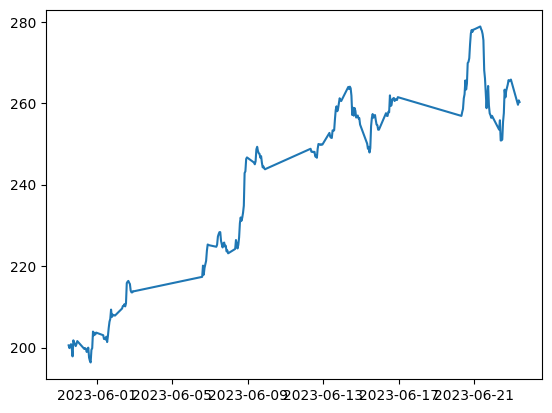

In [9]:
# line plot tsla stock price
import matplotlib.pyplot as plt
plt.plot(df['time'], df['close'])
plt.show()

In [12]:
import time
#get today's date
today = time.strftime("%Y-%m-%d")
print(today)

2023-07-06


In [26]:
import os
tdapikey = os.environ['TDAPIKEY']

from twelvedata import TDClient
td = TDClient(apikey=tdapikey)
ts = td.time_series(symbol="TSLA", interval="1h", start_date="2020-01-01", end_date=today, outputsize=5000)
ts.as_pandas()

,open,high,low,close,volume
datetime,,,,,
2023-07-05 15:30:00,282.31000,283.85001,281.81000,282.44000,12527968
2023-07-05 14:30:00,279.44989,282.39001,279.42999,282.32990,15309690
2023-07-05 13:30:00,280.79001,281.04990,278.75000,279.41000,12675485
2023-07-05 12:30:00,279.38000,281.23001,278.88000,280.79999,14127743
2023-07-05 11:30:00,278.50000,280.20001,277.60001,279.37000,15612276
...,...,...,...,...,...
2020-08-28 13:30:00,441.84800,449.27998,441.26201,444.68853,2215078
2020-08-28 12:30:00,454.11602,454.12456,437.84199,441.61001,3710783
2020-08-28 11:30:00,456.29800,457.16802,452.81001,454.10820,1265682


In [27]:
ts_pd = ts.as_pandas()

In [28]:
# change name into column
ts_pd.reset_index(level=0, inplace=True)
print(ts_pd)

                datetime       open       high        low      close    volume
0    2023-07-05 15:30:00  282.31000  283.85001  281.81000  282.44000  12527968
1    2023-07-05 14:30:00  279.44989  282.39001  279.42999  282.32990  15309690
2    2023-07-05 13:30:00  280.79001  281.04990  278.75000  279.41000  12675485
3    2023-07-05 12:30:00  279.38000  281.23001  278.88000  280.79999  14127743
4    2023-07-05 11:30:00  278.50000  280.20001  277.60001  279.37000  15612276
...                  ...        ...        ...        ...        ...       ...
4995 2020-08-28 13:30:00  441.84800  449.27998  441.26201  444.68853   2215078
4996 2020-08-28 12:30:00  454.11602  454.12456  437.84199  441.61001   3710783
4997 2020-08-28 11:30:00  456.29800  457.16802  452.81001  454.10820   1265682
4998 2020-08-28 10:30:00  458.78662  458.78662  450.60801  456.51758   2401791
4999 2020-08-28 09:30:00  459.21802  463.69800  452.71602  458.60000   5361708

[5000 rows x 6 columns]


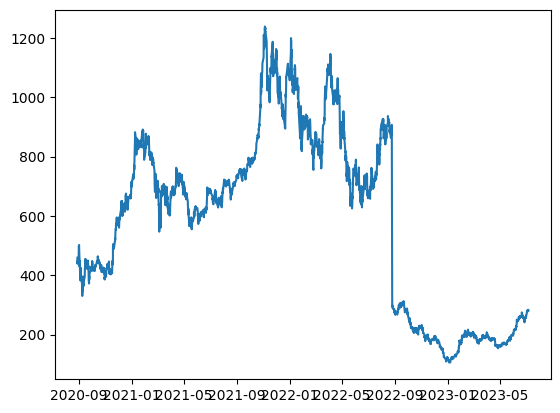

In [29]:
#plot tsla stock price
plt.plot(ts_pd['datetime'], ts_pd['close'])
plt.show()

In [51]:
t_date_close = ts_pd[['datetime', 'close']]
# change column datetime into date
t_date_close['datetime'] = pd.to_datetime(t_date_close['datetime']).dt.date
#reverse the order of the dataframe
t_date_close = t_date_close.iloc[::-1]
# set index to datetime
t_date_close.set_index('datetime', inplace=True)


train = t_date_close[:4000]
test = t_date_close[4000:]
y = train['close']

/tmp/ipykernel_5304/1893299750.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_date_close['datetime'] = pd.to_datetime(t_date_close['datetime']).dt.date


In [52]:
train

,close
datetime,
2020-08-28,458.60000
2020-08-28,456.51758
2020-08-28,454.10820
2020-08-28,441.61001
2020-08-28,444.68853
...,...
2022-12-06,177.87500
2022-12-06,178.07001
2022-12-06,178.95000


In [67]:
# #plot train and test with different color
# plt.plot(train['datetime'], train['close'], color='blue')
# plt.plot(test['datetime'], test['close'], color='red')
# plt.show()

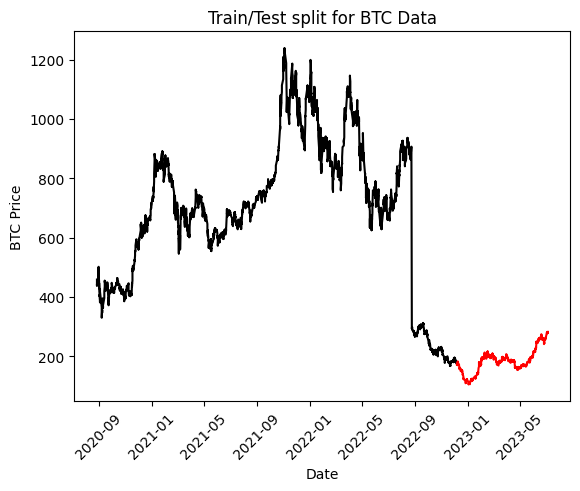

In [55]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.show()

In [72]:
from statsmodels.tsa.arima.model import ARIMA

ARIMAmodel = ARIMA(y, order = (6, 5, 5))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 


/home/drew99/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/drew99/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/drew99/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/drew99/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA pa

/home/drew99/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/drew99/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/drew99/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


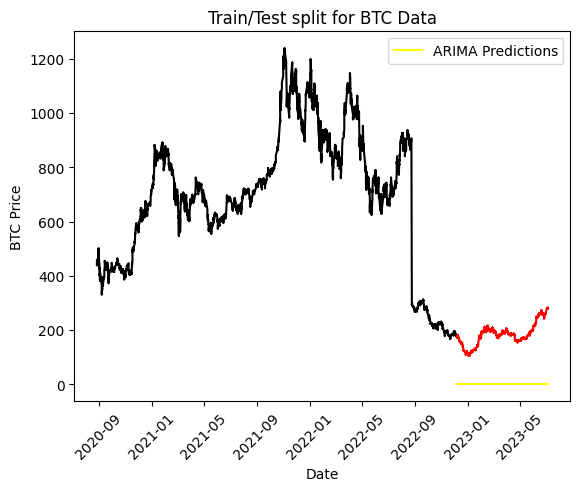

In [73]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
plt.legend()
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.show()

In [68]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

SARIMAXmodel = SARIMAX(y, order = (3, 3, 3), seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 


/home/drew99/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/drew99/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/drew99/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.77595D+00    |proj g|=  1.03343D-01


 This problem is unconstrained.



At iterate    5    f=  4.70707D+00    |proj g|=  1.84829D-02

At iterate   10    f=  4.49286D+00    |proj g|=  2.76907D-01

At iterate   15    f=  4.29416D+00    |proj g|=  2.52618D-02

At iterate   20    f=  4.28070D+00    |proj g|=  6.58127D-02

At iterate   25    f=  4.27447D+00    |proj g|=  2.53123D-02

At iterate   30    f=  4.25586D+00    |proj g|=  9.06977D-03

At iterate   35    f=  4.24506D+00    |proj g|=  1.57472D-02

At iterate   40    f=  4.24232D+00    |proj g|=  2.55993D-02

At iterate   45    f=  4.24131D+00    |proj g|=  2.15935D-03


/home/drew99/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  4.24069D+00    |proj g|=  5.12036D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     56      1     0     0   5.120D-03   4.241D+00
  F =   4.2406882950573452     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/home/drew99/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/drew99/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


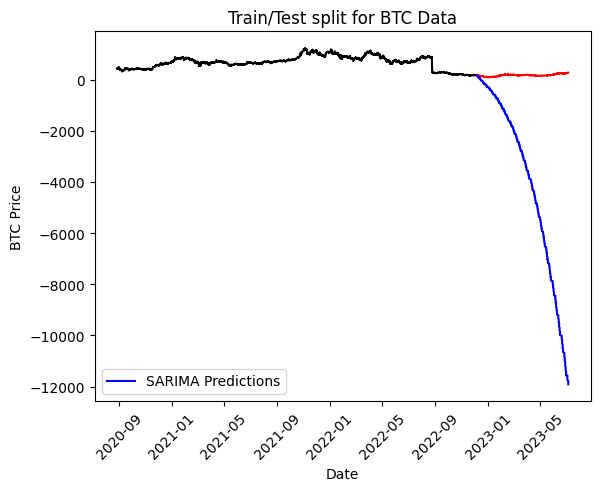

In [69]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(y_pred_out, color='Blue', label = 'SARIMA Predictions')
plt.legend()
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.show()

In [71]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from itertools import product

t_date_close = ts_pd[['datetime', 'close']]
t_date_close['datetime'] = pd.to_datetime(t_date_close['datetime']).dt.date
t_date_close = t_date_close.iloc[::-1]
t_date_close.set_index('datetime', inplace=True)

train = t_date_close[:4000]
test = t_date_close[4000:]
y = train['close']

# Define the parameter grid for ARIMA
p_values = [0, 1, 2, 3, 4, 5, 6]
d_values = [0, 1, 2, 3, 4, 5, 6]
q_values = [0, 1, 2, 3, 4, 5, 6]
param_grid = list(product(p_values, d_values, q_values))

best_aic = float("inf")
best_order = None

# Iterate over parameter grid
for order in param_grid:
    try:
        model = ARIMA(y, order=order)
        model_fit = model.fit()
        aic = model_fit.aic

        if aic < best_aic:
            best_aic = aic
            best_order = order

    except:
        continue

# Train the best model on the entire training set
best_model = ARIMA(y, order=best_order)
best_model_fit = best_model.fit()

# Generate predictions for the test set
y_pred = best_model_fit.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df["Predictions"] = best_model_fit.predict(start=y_pred_df.index[0], end=y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

print("Best ARIMA model parameters:", best_order)


/tmp/ipykernel_5304/757647039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_date_close['datetime'] = pd.to_datetime(t_date_close['datetime']).dt.date
/home/drew99/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/drew99/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/drew99/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.

Best ARIMA model parameters: (6, 5, 5)


In [ ]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(y_pred_out, color='Yellow', label = 'Best ARIMA Predictions')
plt.legend()
plt.ylabel('TSLA Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for TSLA Data")
plt.show()